**Exercise 9.11**.  Simulate an MA(1) process with $\theta = 0.6$ and $\mu = 100$.  Simulate 36 values but set aside the last 4 values to compare forecasts to actual values.

**(a)** Using the first 32 values of the series, find the values for the maximum likelihood estimates of the $\theta$ and $\mu$.

**(b)** Using the estimated model, forecast the next four values of the series. Plot the series together with the four forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the four forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_arima(phi=[], d=0, theta=[], n=100):
    """
    Generates an ARIMA distribution with specified phi, d, and theta parameters.
    """
    
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [3]:
np.random.seed(2000)
Y = generate_arima(theta=0.6, n=36) + 100

**(a)**

In [4]:
model = ARIMA(Y[:32], order=(0, 0, 1)).fit(method='mle')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(0, 1)   Log Likelihood                 -45.735
Method:                           mle   S.D. of innovations              0.957
Date:                Thu, 14 May 2020   AIC                             97.470
Time:                        09:03:21   BIC                            101.867
Sample:                             0   HQIC                            98.928
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8990      0.017   5712.202      0.000      99.865      99.933
ma.L1.y       -0.9999      0.090    -11.163      0.000      -1.176      -0.824
                                    Roots           

**(b)**

In [5]:
Y_pred, se, _ = model.forecast(steps=4)

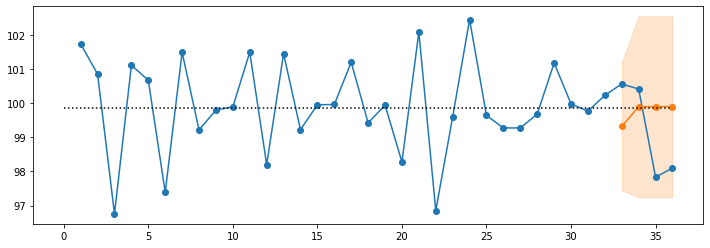

In [6]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)** The actual values are within the predicted values -- also note that the predictions are just the process mean beyond the first lag.

**(d)**  See (b).

**(e)**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(0, 1)   Log Likelihood                 -44.953
Method:                           mle   S.D. of innovations              0.934
Date:                Thu, 14 May 2020   AIC                             95.906
Time:                        09:03:21   BIC                            100.303
Sample:                             0   HQIC                            97.364
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9972      0.017   5859.273      0.000      99.964     100.031
ma.L1.y       -0.9999      0.152     -6.586      0.000      -1.298      -0.702
                                    Roots           

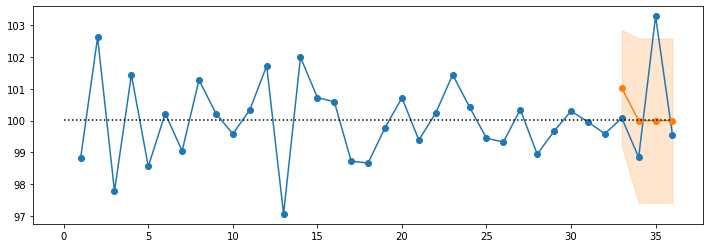

In [7]:
np.random.seed(2001)
Y = generate_arima(theta=0.6, n=36) + 100

model = ARIMA(Y[:32], order=(0, 0, 1)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=4)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

One of the actual points is outside of the confidence interval; it does seem as an outlier compared with the rest of the process.

**Exercise 9.12**.  Simulate an MA(2) process with $\theta_1 = 1$, $\theta_2 = −0.6$, and $\mu = 100$.  Simulate 36 values but set aside the last 4 values with compare forecasts to actual values.

**(a)** Using the first 32 values of the series, find the values for the maximum likelihood estimates of the $\theta$'s and $\mu$.

**(b)** Using the estimated model, forecast the next four values of the series.  Plot the series together with the four forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** What is special about the forecasts at lead times 3 and 4?

**(d)** Compare the four forecasts with the actual values that you set aside.

**(e)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(f)** Repeat parts (a) through (e) with a new simulated series using the same values
of the parameters and same sample size.

**Solution**.

In [8]:
np.random.seed(2000)
Y = generate_arima(theta=[1, -0.6], n=36) + 100

**(a)**

In [9]:
model = ARIMA(Y[:32], order=(0, 0, 2)).fit(method='mle')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(0, 2)   Log Likelihood                 -46.307
Method:                           mle   S.D. of innovations              0.975
Date:                Thu, 14 May 2020   AIC                            100.615
Time:                        09:03:22   BIC                            106.478
Sample:                             0   HQIC                           102.558
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8713      0.079   1270.114      0.000      99.717     100.025
ma.L1.y       -1.3919      0.248     -5.604      0.000      -1.879      -0.905
ma.L2.y        0.8544      0.272      3.139      0.0

**(b)**

In [10]:
Y_pred, se, _ = model.forecast(steps=4)

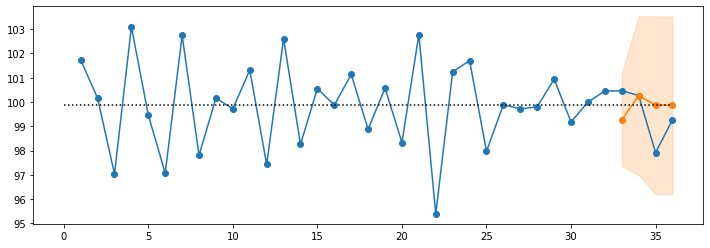

In [11]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c, d, e)** The values are within the confidence interval.  The predicted values past lag 2 are the process mean.

**(f)**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   32
Model:                     ARMA(0, 2)   Log Likelihood                 -45.779
Method:                           mle   S.D. of innovations              0.993
Date:                Thu, 14 May 2020   AIC                             99.558
Time:                        09:03:22   BIC                            105.421
Sample:                             0   HQIC                           101.502
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9737      0.110    909.224      0.000      99.758     100.189
ma.L1.y       -0.9318      0.135     -6.922      0.000      -1.196      -0.668
ma.L2.y        0.5619      0.175      3.207      0.0

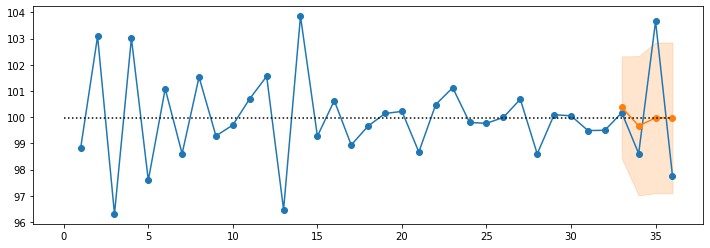

In [12]:
np.random.seed(2001)
Y = generate_arima(theta=[1, -0.6], n=36) + 100

model = ARIMA(Y[:32], order=(0, 0, 2)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=4)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

One value seems like an outlier -- and it falls outside of the confidence interval.

**Exercise 9.13**. Simulate an ARMA(1,1) process with $\phi = 0.7$, $\theta = −0.5$, and $\mu = 100$.  Simulate 50 values but set aside the last 10 values to compare forecasts with actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of $\phi$, $\theta$, and $\mu$.

**(b)** Using the estimated model, forecast the next ten values of the series.  Plot the series together with the ten forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the ten forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits.  Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [13]:
np.random.seed(2000)
Y = generate_arima(phi=0.7, theta=-0.5, n=50) + 100

**(a)**

In [14]:
model = ARIMA(Y[:40], order=(1, 0, 1)).fit(method='mle')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(1, 1)   Log Likelihood                 -62.225
Method:                           mle   S.D. of innovations              1.130
Date:                Thu, 14 May 2020   AIC                            132.450
Time:                        09:03:22   BIC                            139.206
Sample:                             0   HQIC                           134.893
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.1563      0.490    202.477      0.000      98.196     100.116
ar.L1.y        0.4284      0.161      2.657      0.008       0.112       0.744
ma.L1.y        0.6083      0.128      4.745      0.0

**(b)**

In [15]:
Y_pred, se, _ = model.forecast(steps=10)

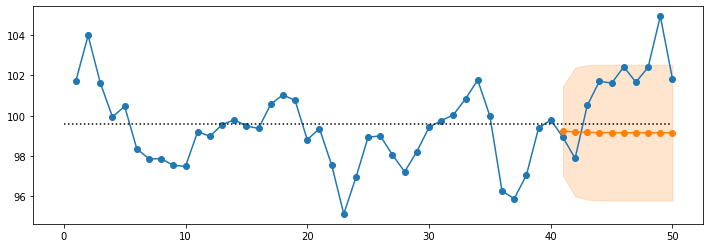

In [16]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)**  One of the values seems to fall outside of the confidence intervals.

**(d)**  See (b).

**(e)**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(1, 1)   Log Likelihood                 -56.586
Method:                           mle   S.D. of innovations              0.979
Date:                Thu, 14 May 2020   AIC                            121.171
Time:                        09:03:22   BIC                            127.927
Sample:                             0   HQIC                           123.614
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0006      0.551    181.643      0.000      98.922     101.080
ar.L1.y        0.5829      0.142      4.104      0.000       0.305       0.861
ma.L1.y        0.5454      0.125      4.375      0.0

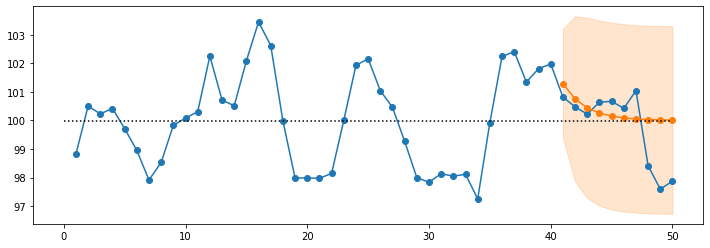

In [17]:
np.random.seed(2001)
Y = generate_arima(phi=0.7, theta=-0.5, n=50) + 100

model = ARIMA(Y[:40], order=(1, 0, 1)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=10)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

All values fall within the confidence interval.

**Exercise 9.14**.  Simulate an IMA(1,1) process with $\theta = 0.8$ and $\theta_0 = 0$. Simulate 35 values, but set aside the last five values to compare forecasts with actual values.

**(a)** Using the first 30 values of the series, find the value for the maximum likelihood estimate of $\theta$.

**(b)** Using the estimated model, forecast the next five values of the series.  Plot the series together with the five forecasts.  What is special about the forecasts?

**(c)** Compare the five forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits.  Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [18]:
np.random.seed(2000)
Y = generate_arima(d=1, theta=-0.8, n=35) 

**(a)**

In [19]:
model = ARIMA(Y[:30], order=(0, 1, 1)).fit(method='mle', trend='nc')
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -46.535
Method:                           mle   S.D. of innovations              1.186
Date:                Thu, 14 May 2020   AIC                             97.070
Time:                        09:03:23   BIC                             99.805
Sample:                             1   HQIC                            97.926
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y      0.7591      0.115      6.606      0.000       0.534       0.984
                                    Roots                                    
                  Real          Imaginary           M

In [20]:
Y_pred, se, _ = model.forecast(steps=5)

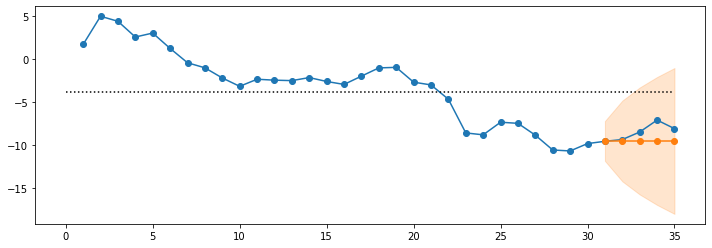

In [21]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 1
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)**  Actual values lie within the forecast confidence interval.

**(d)**  See (b).

**(e)**

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -38.255
Method:                           mle   S.D. of innovations              0.873
Date:                Thu, 14 May 2020   AIC                             80.510
Time:                        09:03:23   BIC                             83.244
Sample:                             1   HQIC                            81.366
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y      0.9370      0.147      6.383      0.000       0.649       1.225
                                    Roots                                    
                  Real          Imaginary           M

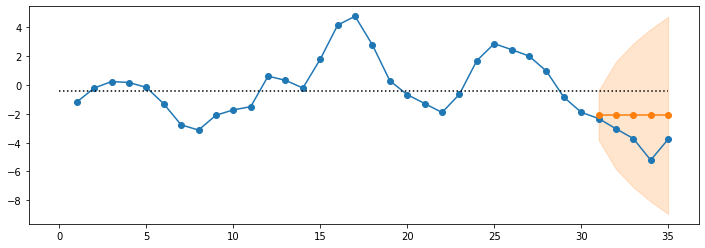

In [22]:
np.random.seed(2001)
Y = generate_arima(d=1, theta=-0.8, n=35) 

model = ARIMA(Y[:30], order=(0, 1, 1)).fit(method='mle', trend='nc')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=5)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 1
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

Actual values again lie within the forecast confidence interval.

**Exercise 9.15**.  Simulate an IMA(1,1) process with $\theta = 0.8$ and $\theta_0 = 10$.  Simulate 35 values, but set aside the last five values to compare forecasts to actual values.

**(a)** Using the first 30 values of the series, find the values for the maximum likelihood estimates of $\theta$ and $\theta_0$.

**(b)** Using the estimated model, forecast the next five values of the series. Plot the
series together with the five forecasts. What is special about these forecasts?

**(c)** Compare the five forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size

**Solution**.

In [23]:
np.random.seed(2000)
Y = generate_arima(d=1, theta=-0.8, n=35) + np.cumsum(10 * np.ones(35))

**(a)**

In [24]:
model = ARIMA(Y[:30], order=(0, 1, 1)).fit(method='mle')
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -46.176
Method:                           mle   S.D. of innovations              1.172
Date:                Thu, 14 May 2020   AIC                             98.352
Time:                        09:03:23   BIC                            102.454
Sample:                             1   HQIC                            99.637
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6788      0.377     25.701      0.000       8.941      10.417
ma.L1.D.y      0.7557      0.118      6.409      0.000       0.525       0.987
                                    Roots           

**(b)**

In [25]:
Y_pred, se, _ = model.forecast(steps=5)

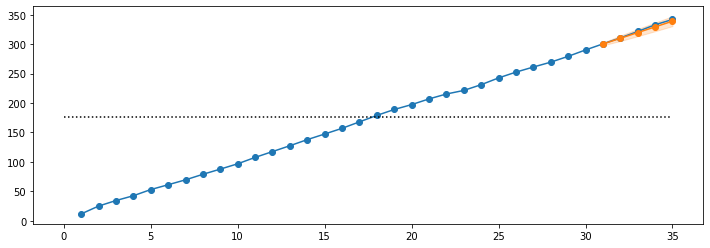

In [26]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 1
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)**  The trend dominates the series.

**(d)**  See (b).

**(e)**

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -38.255
Method:                           mle   S.D. of innovations              0.873
Date:                Thu, 14 May 2020   AIC                             82.509
Time:                        09:03:23   BIC                             86.611
Sample:                             1   HQIC                            83.794
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9941      0.309     32.315      0.000       9.388      10.600
ma.L1.D.y      0.9368      0.147      6.384      0.000       0.649       1.224
                                    Roots           

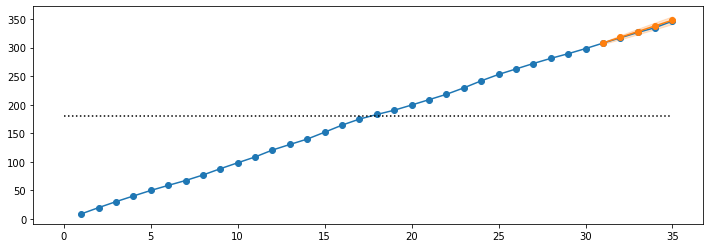

In [27]:
np.random.seed(2001)
Y = generate_arima(d=1, theta=-0.8, n=35) + np.cumsum(10 * np.ones(35))

model = ARIMA(Y[:30], order=(0, 1, 1)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=5)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 1
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

Again, the the trend dominates the series.

For illustrative purposes, here's the same exercise with a trend $\theta_0 = |1$:

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -38.255
Method:                           mle   S.D. of innovations              0.873
Date:                Thu, 14 May 2020   AIC                             82.509
Time:                        09:03:23   BIC                             86.611
Sample:                             1   HQIC                            83.794
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9941      0.309      3.214      0.001       0.388       1.600
ma.L1.D.y      0.9368      0.147      6.384      0.000       0.649       1.224
                                    Roots           

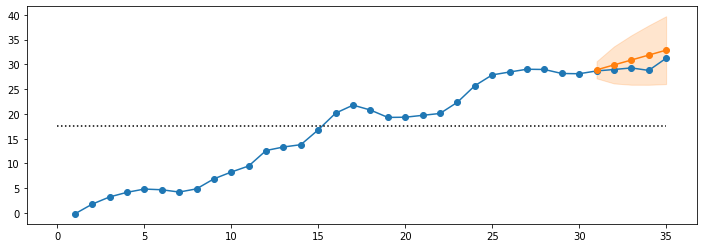

In [28]:
np.random.seed(2001)
Y = generate_arima(d=1, theta=-0.8, n=35) + np.cumsum(1 * np.ones(35))

model = ARIMA(Y[:30], order=(0, 1, 1)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=5)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 1
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**Exercise 9.16**. Simulate an IMA(2,2) process with $\theta_1 = 1$, $\theta_2 = −0.75$, and $\theta_0 = 0$.  Simulate 45 values, but set aside the last five values to compare forecasts with actual values.

**(a)** Using the first 40 values of the series, find the value for the maximum likelihood estimate of $\theta_1$ and $\theta_2$.

**(b)** Using the estimated model, forecast the next five values of the series.  Plot the series together with the five forecasts. What is special about the forecasts?

**(c)** Compare the five forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [29]:
np.random.seed(2000)
Y = generate_arima(d=2, theta=[1, -0.75], n=45)

**(a)**

In [30]:
model = ARIMA(Y[:40], order=(0, 2, 2)).fit(method='mle', trend='nc')
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   38
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -60.445
Method:                           mle   S.D. of innovations              1.164
Date:                Thu, 14 May 2020   AIC                            126.889
Time:                        09:03:24   BIC                            131.802
Sample:                             2   HQIC                           128.637
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D2.y    -1.0440      0.147     -7.115      0.000      -1.332      -0.756
ma.L2.D2.y     0.6194      0.118      5.231      0.000       0.387       0.851
                                    Roots           

**(b)**

In [31]:
Y_pred, se, _ = model.forecast(steps=5)

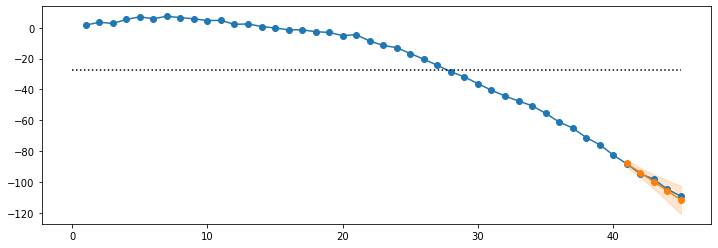

In [32]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 2
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)**  The actual values lie within the confidence interval of the forecast.

**(d)**  See (b).

**(e)**

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   38
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -55.728
Method:                           mle   S.D. of innovations              1.014
Date:                Thu, 14 May 2020   AIC                            117.456
Time:                        09:03:24   BIC                            122.369
Sample:                             2   HQIC                           119.204
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D2.y    -0.9925      0.096    -10.392      0.000      -1.180      -0.805
ma.L2.D2.y     0.8146      0.128      6.341      0.000       0.563       1.066
                                    Roots           

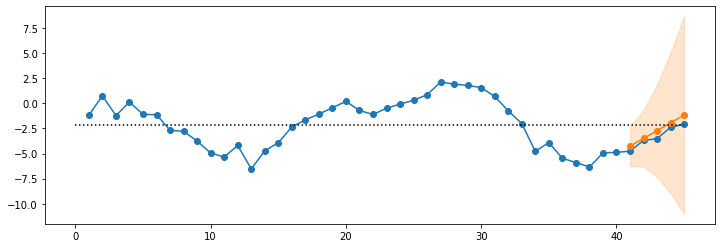

In [33]:
np.random.seed(2001)
Y = generate_arima(d=2, theta=[1, -0.75], n=45)

model = ARIMA(Y[:40], order=(0, 2, 2)).fit(method='mle', trend='nc')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=5)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 2
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

Very wide confidence intervals here, as the trend is relatively small in the forecast period; the actual values still lie within the confidence interval.

**Exercise 9.17**.  Simulate an IMA(2,2) process with $\theta_1 = 1$, $\theta_2 = −0.75$, and $\theta_0 = 10$.  Simulate 45 values, but set aside the last five values to compare forecasts with actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of $\theta_1$, $\theta_2$, and $\theta_0$.

**(b)** Using the estimated model, forecast the next five values of the series. Plot the series together with the five forecasts. What is special about these forecasts?

**(c)** Compare the five forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [34]:
np.random.seed(2000)
Y = generate_arima(d=2, theta=[1, -0.75], n=45) + np.cumsum(np.cumsum(10 * np.ones(45)))

**(a)**

In [35]:
model = ARIMA(Y[:40], order=(0, 2, 2)).fit(method='mle')
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   38
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -58.589
Method:                           mle   S.D. of innovations              1.108
Date:                Thu, 14 May 2020   AIC                            125.178
Time:                        09:03:24   BIC                            131.729
Sample:                             2   HQIC                           127.509
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8101      0.086    114.111      0.000       9.642       9.979
ma.L1.D2.y    -1.1232      0.150     -7.469      0.000      -1.418      -0.828
ma.L2.D2.y     0.6017      0.153      3.930      0.0

**(b)**

In [36]:
Y_pred, se, _ = model.forecast(steps=5)

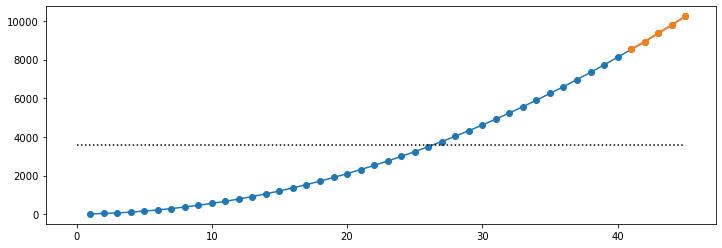

In [37]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 2
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)** The trend dominates over the non-deterministic components.

**(d)**  See (b).

**(e)** 

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   38
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -55.728
Method:                           mle   S.D. of innovations              1.014
Date:                Thu, 14 May 2020   AIC                            119.456
Time:                        09:03:24   BIC                            126.007
Sample:                             2   HQIC                           121.787
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9993      0.133     75.244      0.000       9.739      10.260
ma.L1.D2.y    -0.9925      0.096    -10.374      0.000      -1.180      -0.805
ma.L2.D2.y     0.8146      0.129      6.335      0.0

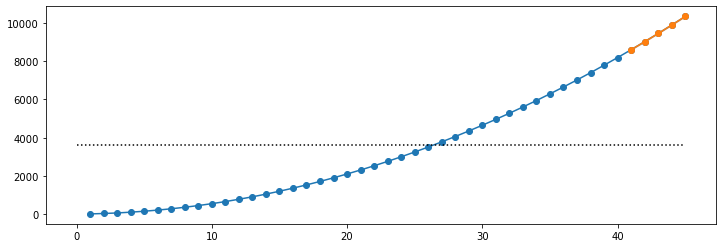

In [38]:
np.random.seed(2001)
Y = generate_arima(d=2, theta=[1, -0.75], n=45) + np.cumsum(np.cumsum(10 * np.ones(45)))

model = ARIMA(Y[:40], order=(0, 2, 2)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=5)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 2
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

Once again, the trend dominates over non-deterministic components.

If, for illustration, we were to use a much smaller trend $\theta_0 = 0.01$:

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   38
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -57.151
Method:                           mle   S.D. of innovations              1.054
Date:                Thu, 14 May 2020   AIC                            122.301
Time:                        09:03:24   BIC                            128.851
Sample:                             2   HQIC                           124.632
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0696      0.108     -0.645      0.519      -0.281       0.142
ma.L1.D2.y    -1.1486      0.099    -11.648      0.000      -1.342      -0.955
ma.L2.D2.y     0.7906      0.128      6.165      0.0

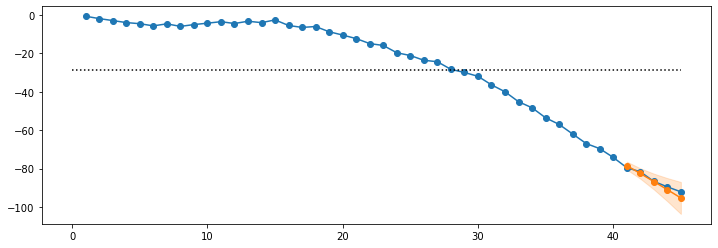

In [39]:
np.random.seed(5000)
Y = generate_arima(d=2, theta=[1, -0.75], n=45) + np.cumsum(np.cumsum(0.01 * np.ones(45)))

model = ARIMA(Y[:40], order=(0, 2, 2)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=5)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

m = model.nobs + 2
n = len(Y)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.plot(np.arange(m+1, n+1), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(m+1, n+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, n], [process_mean, process_mean], ls=':', color='black')
plt.show()

The series still falls within the prediction interval.